# Assignment 3 - LNG Terminals & Electricity Markets
## Task 1: LNG Terminals [30 points]
#### Required Tools: geopandas, pandas, matplotlib, cartopy
##### In this task, you will analyse data from the Global Gas Infrastructure Tracker published by Global Energy Monitor. This dataset includes data on liquefied natural gas (LNG) import and export terminals around the globe. You can find the dataset here:
##### File: https://tubcloud.tu-berlin.de/s/QWXsKqHTnfWxRzj/download/GEM-GGIT-LNG-Terminals-July2022.xlsx
##### [2 points] (a) Read the Excel table into a pandas.DataFrame using the pd.read_excel function. Make sure to identify the following strings as NaN values when reading in the file: “Unknown”, “TBD”, “–”, ” “.

In [64]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import cartopy
import cartopy.crs as ccrs

import warnings


In [65]:
df = pd.read_excel("GEM-GGIT-LNG-Terminals-July2022.xlsx", na_values=["nan", "Nan", "Unknown", "TBD", "–", "", ' ', 'nan', '--'], index_col = "ComboID",
                  thousands=",")
df.head(2)

,TerminalID,ProjectID,Country,Region,Wiki,TerminalName,UnitName,OtherEnglishNames,Owner,Parent,...,State/Province,Latitude,Longitude,Accuracy,Floating,FID,FIDYear,OtherLanguageName,PowerPlantsSupplied,OtherLanguageWikiPage
ComboID,,,,,,,,,,,,,,,,,,,,,
T020501,T0205,1,United States,North America,https://www.gem.wiki/Fourchon_LNG_Terminal,Fourchon LNG Terminal,Phase 1,Gulf Coast LNG Terminal,Fourchon LNG LLC [100.00%],Energy World [100.00%],...,Louisiana,29.105833,-90.194444,approximate,NaN,Pre-FID,NaN,NaN,NaN,NaN
T020502,T0205,2,United States,North America,https://www.gem.wiki/Fourchon_LNG_Terminal,Fourchon LNG Terminal,Phase 2,Gulf Coast LNG Terminal,Fourchon LNG LLC [100.00%],Energy World [100.00%],...,Louisiana,29.105833,-90.194444,approximate,NaN,Pre-FID,NaN,NaN,NaN,NaN


#### [2 points] (b) Using the coordinates included in the dataset, build a geopandas.GeoDataFrame.

In [4]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf.head(2)

,TerminalID,ProjectID,Country,Region,Wiki,TerminalName,UnitName,OtherEnglishNames,Owner,Parent,...,Latitude,Longitude,Accuracy,Floating,FID,FIDYear,OtherLanguageName,PowerPlantsSupplied,OtherLanguageWikiPage,geometry
ComboID,,,,,,,,,,,,,,,,,,,,,
T020501,T0205,1,United States,North America,https://www.gem.wiki/Fourchon_LNG_Terminal,Fourchon LNG Terminal,Phase 1,Gulf Coast LNG Terminal,Fourchon LNG LLC [100.00%],Energy World [100.00%],...,29.105833,-90.194444,approximate,NaN,Pre-FID,NaN,NaN,NaN,NaN,POINT (-90.19444 29.10583)
T020502,T0205,2,United States,North America,https://www.gem.wiki/Fourchon_LNG_Terminal,Fourchon LNG Terminal,Phase 2,Gulf Coast LNG Terminal,Fourchon LNG LLC [100.00%],Energy World [100.00%],...,29.105833,-90.194444,approximate,NaN,Pre-FID,NaN,NaN,NaN,NaN,POINT (-90.19444 29.10583)


#### [2 points] (c) Convert the capacities given in Mtpa (mega tonnes per year) into TWh and store the resulting values in a new column “CapacityInTWh”.

In [5]:
gdf.loc[:,   'Import/Export': 'Location']
gdf.columns

Index(['TerminalID', 'ProjectID', 'Country', 'Region', 'Wiki', 'TerminalName',
       'UnitName', 'OtherEnglishNames', 'Owner', 'Parent', 'Status',
       'StartYear1', 'StartYear2', 'StartYear3', 'StopYear', 'Import/Export',
       'Capacity', 'CapacityUnits', 'CapacityInMtpa', 'Location',
       'Prefecture/District', 'State/Province', 'Latitude', 'Longitude',
       'Accuracy', 'Floating', 'FID', 'FIDYear', 'OtherLanguageName',
       'PowerPlantsSupplied', 'OtherLanguageWikiPage', 'geometry'],
      dtype='object')

#### [2 points] (d) How many LNG terminals are included in the dataset and what is the median capacity in TWh?

In [6]:
number_of_terminals = len(gdf.groupby("TerminalID").groups)
print(f"There are {number_of_terminals} Terminals if every terminal has a unique ID")
print(f"The Terminals have a median capacity of {number_of_terminals} TWh")


There are 730 Terminals if every terminal has a unique ID
The Terminals have a median capacity of 730 TWh


#### [2 points] (e) What share of import terminals is floating?

In [7]:
import_terminals = gdf.groupby(["Import/Export"]).get_group('Import')
number_import = int(len(import_terminals))
import_floating = gdf.groupby(["Import/Export", "Floating"]).get_group(('Import', 'yes'))
number_of_import_floating = int(len(import_floating))
print(f"{number_of_import_floating*100/number_import}% of import Terminals in the Dataset are floating Terminals")

29.042904290429043% of import Terminals in the Dataset are floating Terminals


#### [2 points] (f) Print the information of the oldest operating LNG terminal. In which country is it located?

In [8]:
oldest = gdf.loc[gdf.sort_values(by = "StartYear1").index[0], :]
print(f"The oldest LNG Terminal is located in {oldest.Country} with following 'information':")
gdf.loc[gdf.sort_values(by = "StartYear1").index[0], :]


The oldest LNG Terminal is located in Algeria with following 'information':


TerminalID                                                          T0243
ProjectID                                                               0
Country                                                           Algeria
Region                                       Middle East and North Africa
Wiki                     https://www.gem.wiki/Arzew-Bethioua_LNG_Terminal
TerminalName                                  Arzew-Bethioua LNG Terminal
UnitName                                                             GLZ4
OtherEnglishNames                                                     NaN
Owner                                                 Sonatrach [100.00%]
Parent                                                Sonatrach [100.00%]
Status                                                            Retired
StartYear1                                                         1964.0
StartYear2                                                            NaN
StartYear3                            

#### [2 points] (g) Create a bar plot outlining the 10 countries with the largest LNG terminal capacity.

<AxesSubplot: xlabel='Country', ylabel='LNG Capacity [TWh/a]'>

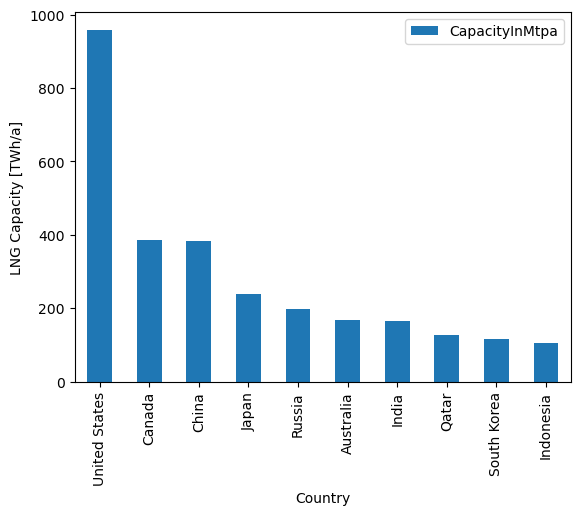

In [9]:
gdf.groupby('Country').agg({'CapacityInMtpa': 'sum'}).sort_values(by="CapacityInMtpa",ascending=False)[:10].plot.bar(ylabel="LNG Capacity [TWh/a]")

#### [2 points] (h) Create a bar plot outlining the LNG terminal capacity per status code.

<AxesSubplot: xlabel='Status', ylabel='LNG Capacity [TWh/a]'>

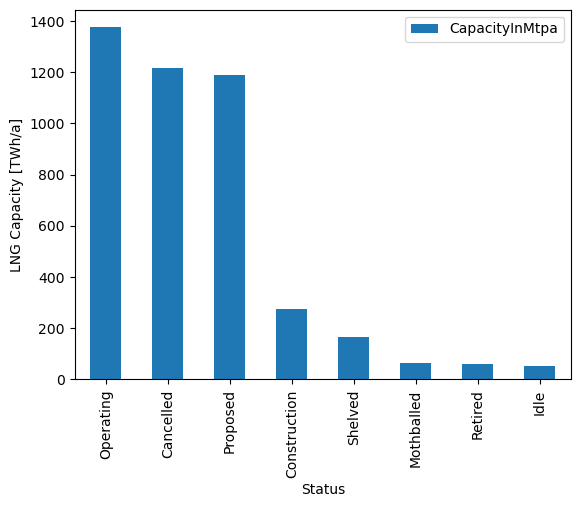

In [10]:
gdf.groupby('Status').agg({'CapacityInMtpa': 'sum'}).sort_values(by="CapacityInMtpa",ascending=False)[:10].plot.bar(ylabel="LNG Capacity [TWh/a]")

#### [2 points] (i) Create a table of the German LNG terminals including information on the name, status, capacity, owner, whether it is floating, and sorted by aspired start year.

In [11]:
gdf.query("Country == 'Germany'").sort_values(by="StartYear1").loc[:, ("TerminalName", "Status", "CapacityInMtpa", "Owner", "Floating", "StartYear1", "FID")]


,TerminalName,Status,CapacityInMtpa,Owner,Floating,StartYear1,FID
ComboID,,,,,,,
T107700,Lubmin FSRU,Proposed,3.31,Deutsche Regas [unknown %],yes,2021.0,NaN
T045800,Wilhelmshaven FSRU,Construction,5.51,Uniper [100.00%],yes,2022.0,NaN
T072200,Rostock LNG Terminal,Cancelled,0.30,Fluxys [unknown %]; Novatek [unknown %],NaN,2023.0,Pre-FID
T100000,Wilhelmshaven NWO FSRU Terminal,Proposed,6.62,Nord West Ölleitung [400.00%],NaN,2023.0,NaN
T108600,Stade FSRU,Proposed,NaN,Unknown [unknown %],yes,2023.0,NaN
T046000,Brunsbüttel FSRU,Proposed,5.88,German LNG Terminal [300.00%],NaN,2024.0,Pre-FID
T100100,TES Wilhelmshaven LNG Terminal,Proposed,11.76,Tree Energy Solutions [100.00%],NaN,2025.0,Pre-FID
T072100,Stade LNG Terminal,Proposed,9.78,Buss Group [unknown %]; Dow Chemical [unknown ...,NaN,2026.0,Pre-FID
T108400,Brunsbüttel LNG Terminal,Proposed,5.88,Gasunie [unknown %]; Oiltanking [unknown %]; V...,NaN,2026.0,Pre-FID


#### [2 points] (j) Create a line chart depicting the number of new LNG termianls per year. Include a vertical line for the year 2022 for orientation.

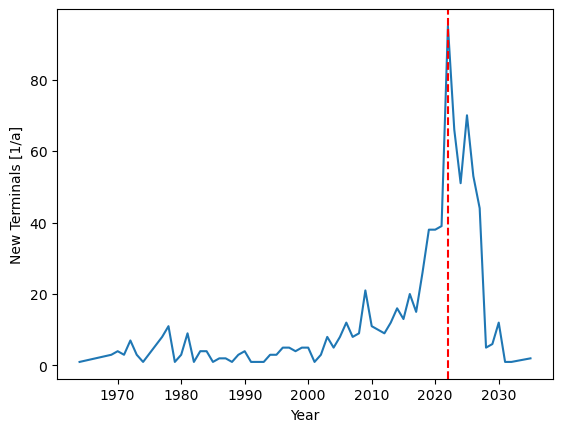

In [12]:
# Grouping Terminals by start year -> Groups represent new Terminals in the year
gdf.groupby('StartYear1').agg(lambda x: len(x)).TerminalID.plot(ylabel="New Terminals [1/a]", xlabel="Year")
plt.axvline(x=2022, color='red', linestyle='--')

#### [5 points] (k) Write a function that takes an extract of the LNG terminals in the geopandas.GeoDataFrame and plots it with the following characteristics:
• Mercator projection with coastlines displayed.

• Marker size proportional to capacity (no legend for size necessary)

• Colors according to status, including a legend.

• Semi-transparent markers (alpha=0.6).

In [13]:


def plot_map(terminals: gpd.GeoDataFrame):
    fig = plt.figure(figsize=(15,15))
    terminals.crs="epsg:4326"
    # Manipulating axes to increase readability: 
    ax = plt.axes(projection=ccrs.Mercator())
    # Beatify
    ax.coastlines()
    # Also adding colors for readability
    ax.add_feature(cartopy.feature.OCEAN, color='azure')
    ax.add_feature(cartopy.feature.LAND, color='cornsilk')
    # Borders
    ax.add_feature(cartopy.feature.BORDERS, color='grey', linewidth=0.5)
    terminals.to_crs(ccrs.Mercator()).plot(ax = ax,
                   column='Status',
                   markersize=terminals.CapacityInMtpa*10, # incresing size for better visibility of small terminals
                   legend=True,
                   alpha=.6,
                         )


#### [5 points] (l) Use the function you created to plot:
• all LNG terminals

• only LNG import terminals

• only LNG export terminals

• only future LNG import terminals (i.e. start year after 2022)

• only floating LNG terminals

All LNG Terminals:


/home/local/RL-INSTITUT/felix.maurer/miniconda3/envs/esm/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


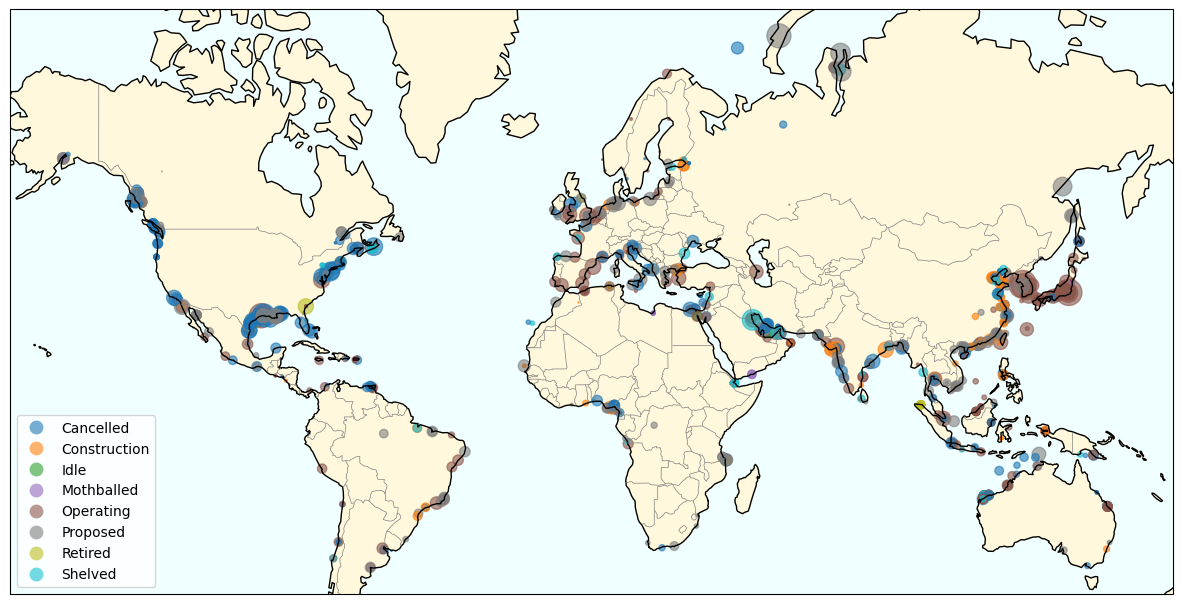

In [14]:
print("All LNG Terminals:")
plot_map(gdf)
import warnings
warnings.filterwarnings(action="ignore")

Only import terminals:


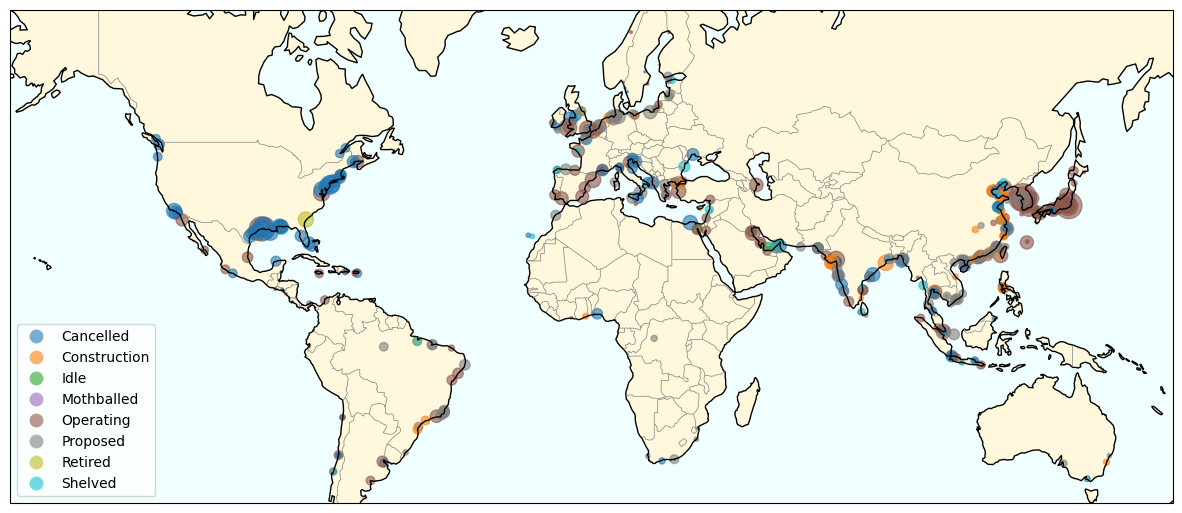

In [15]:
gdf.rename(columns = {'Import/Export':'IE'}, inplace = True)
print("Only import terminals:")
plot_map(gdf.query("IE == 'Import'"))

Only Export terminals:


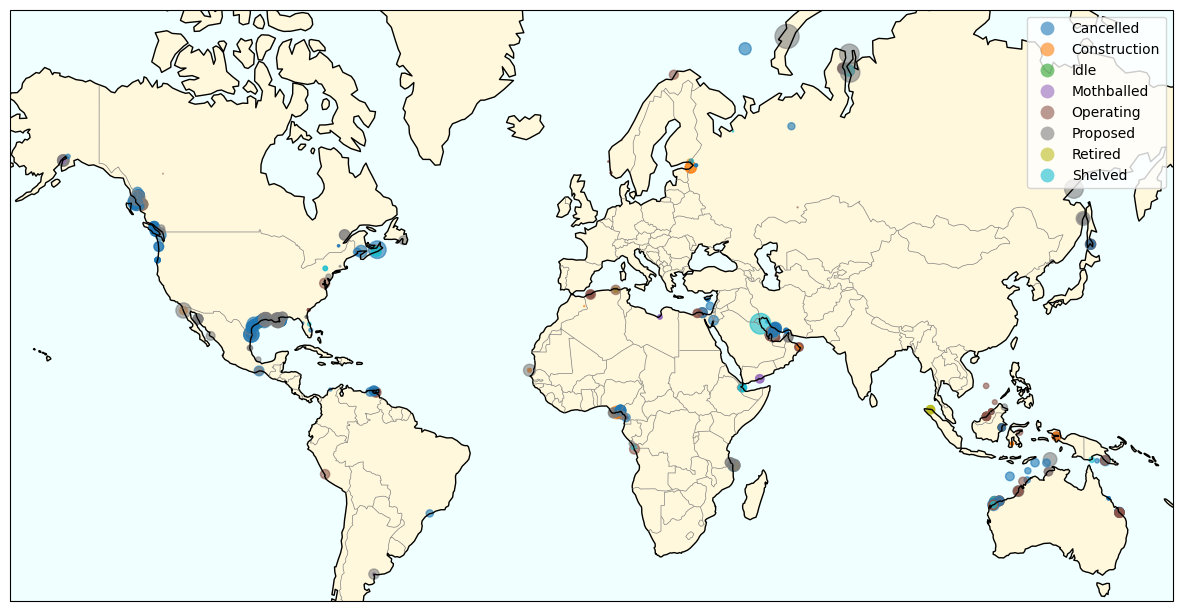

In [16]:
print("Only Export terminals:")
plot_map(gdf.query("IE == 'Export'"))

Only terminals with higher start year than 2022:


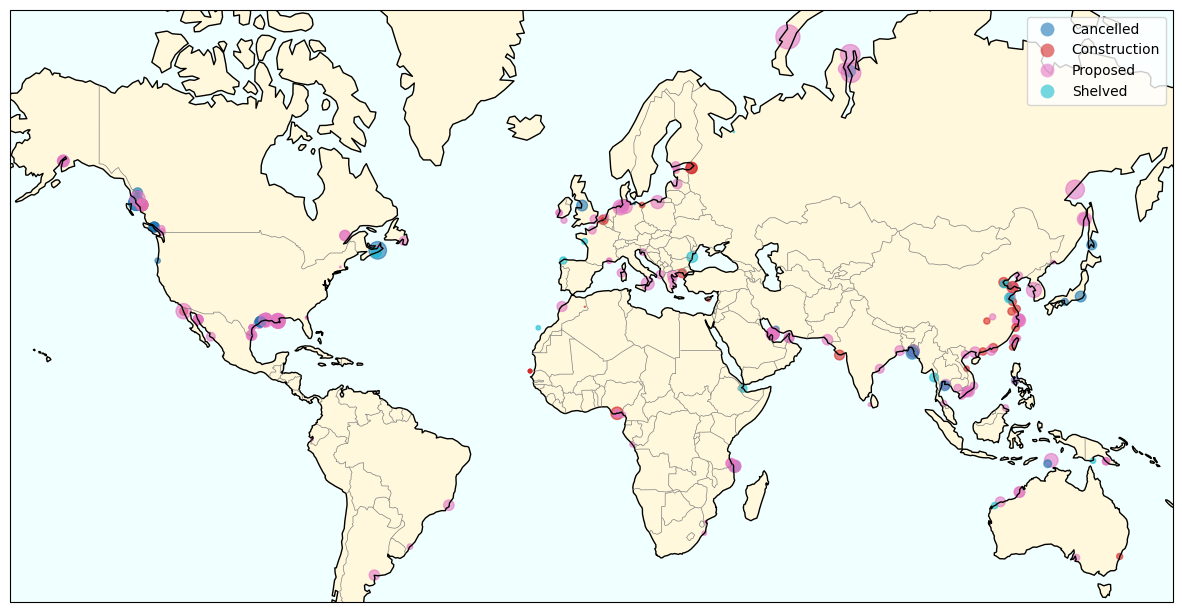

In [17]:
print("Only terminals with higher start year than 2022:")
plot_map(gdf.query("StartYear1 > 2022"))

Only floating terminals:


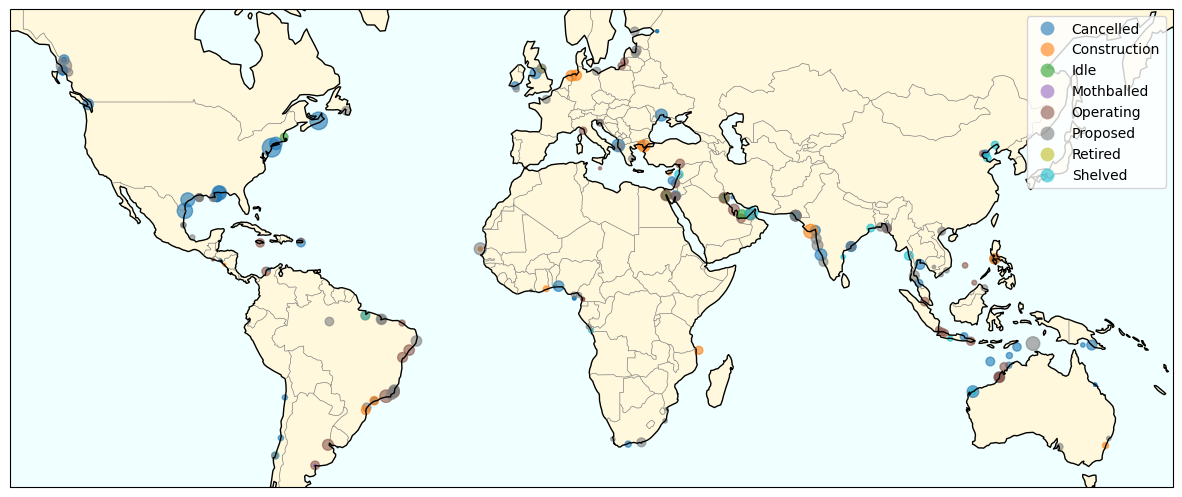

In [18]:
print("Only floating terminals:")
plot_map(gdf.query("Floating == 'yes'")) # There must be some issue either in projection, coordinates or the Dataset.
# I expect Floating Terminals to be on Water(Ocean), yet some seem to be on Land'

## Task 2: Merit Order [42 points]
### Required Tools: pandas, matplotlib
#### In this task you are asked to build and plot merit order curves for the German day-ahead electricity market given a dataset on operational power plants (link 1) and some additinal carrier-specific data (link 2):
##### • https://tubcloud.tu-berlin.de/s/P9qPttqFg3ciKEy/download/powerplants.csv
##### • https://tubcloud.tu-berlin.de/s/XjtnxyNPtPP6eDQ/download/technologies.csv
#### The attributes contained in the two CSV files have the following units:
|Attribute| Description| Unit|
|--------------|-----------|------------|
|carrier| technology| –
|co2_emissions| specific carbon dioxide emissions |t/MWh (thermal)|
|color |HEX color code |–|
|efficiency |conversion efficieny| MWh (electric) / MWh (thermal)|
|marginal_cost |STMGC| €/MWh (electric)|
|p_max_pu |capacity factor in particular hour| p.u.|
|p_nom |rated/nominal capacity |MW|

Assume that all storage has sufficient energy filling levels to dispatch at full capacity.

#### [2 points] (a) Read the provided datasets into two separate pandas.DataFrame.

In [66]:
plants = pd.read_csv("powerplants.csv", index_col = "Unnamed: 0")
techs = pd.read_csv("technologies.csv", index_col = "Carrier")

### [4 points] (b) Plot a pie chart with the distribution of capacities per technology. Color the chart segments according to the given colors, label the segments with the carrier and its capacity share in % rounded to one decimal point.

<AxesSubplot: title={'center': 'Share of Capacity to total capacity'}>

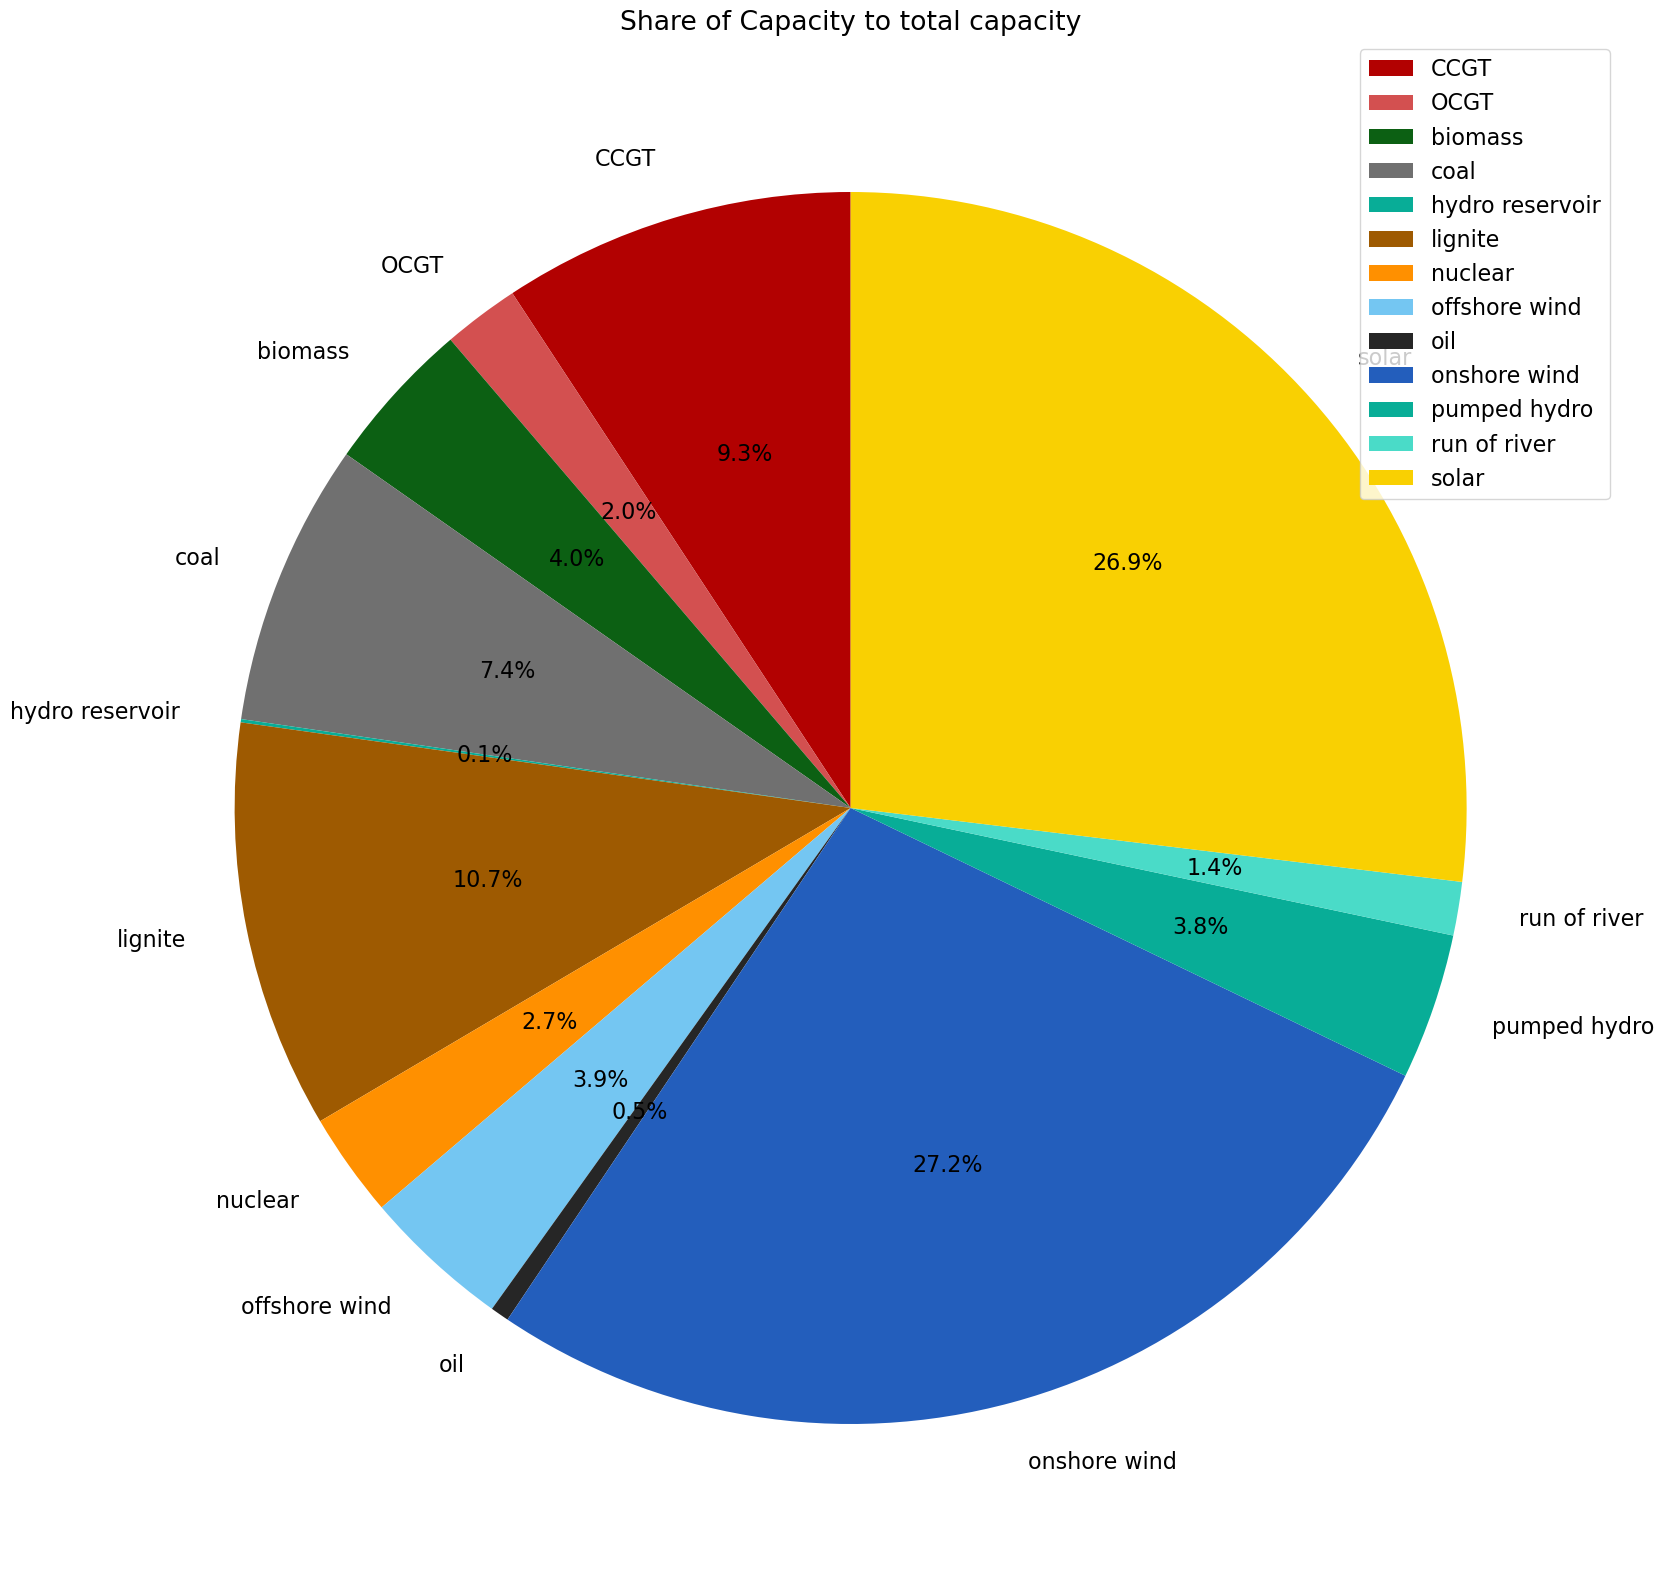

In [67]:
#plants.plot(kind="pie", y="p_nom")
carriers = plants.groupby('carrier').agg({'p_nom': 'sum'})
carriers.loc[:, "color"] = carriers.index.map(lambda x: techs.loc[x,"color"])
#carriers.loc[:, "expl"] = carriers.index.map(lambda x: 0.05)

carriers.plot.pie(
    y="p_nom", 
    autopct='%1.1f%%',startangle=90, figsize=(30,20),
    colors = carriers.color, 
    rot = 30,
    title = "Share of Capacity to total capacity",
    ylabel = "",
    #position = 1,
    #explode=carriers.expl
)

### [8 points] (c) Write a function for plotting the merit order curve (supply side), by adapting the code from an online tutorial at https://tinyurl.com/plt-merit-order or https://archive.vn/Ljroc.
The following criteria should be satisfied:
• The function should take two arguments: a pandas.DataFrame for the power plant data, and another for the carrier-specific information.
 
• The bars of the merit order curve should by coloured according to the given technology colors.

• The extent of the plot should start at the (0,0) origin and be limited to the highest marginal cost and total power plant capacity.

• Axes must be appropriately labelled with units. The preferred unit for the x-axis is GW.

In [109]:
def x_pos(df, x_pos_col):
    df["xpos"] = ""
    for index in df.index:
        #get index number based on index name
        i = df.index.get_loc(index)
        if i == 0:
            #First index
            df.loc[index, "xpos"] = df.loc[index, "Available capacity (MW)"]/2
        else:
            #Sum of cumulative capacity in the row above and the half of available capacity in
            df.loc[index, "xpos"] = df.loc[index, "Available capacity (MW)"]/2 + df.iloc[i-1][x_pos_col]
    return df
#Function to determine the cut_off_power_plant that sets the market clearing price
def cut_off(demand, df):
    #To get the cutoff power plant
    for index in df.index:
        if df.loc[index, "Cumulative capacity (MW)"] < demand:
            pass

        else:
            cut_off_power_plant = index
            #print ("Power plant that sets the electricity price is: ", df.loc[index, "carrier"])
            break


    return cut_off_power_plant

In [110]:
import copy

def merit_order(df, demand, power_plants, x_pos_col, cost_type):

    df  = x_pos(df=df, x_pos_col=x_pos_col)
    plt.figure(figsize = (20, 12))
    plt.rcParams["font.size"] = 16

    colors = df.color
    xpos = df["xpos"].values.tolist()
    y = df[cost_type].values.tolist()

    #width of each bar
    w = df["Available capacity (MW)"].values.tolist()
    cut_off_power_plant = cut_off(demand=demand, df = df)
    fig = plt.bar(xpos,
            height = y,
            width = w,
            fill = True,
            color = colors,
            )

    plt.xlim(0, df["Available capacity (MW)"].sum())
    plt.ylim(0, df[cost_type].max() + 20)

    plt.hlines(y = df.loc[cut_off_power_plant, cost_type],
              xmin = 0,
              xmax = demand,
              color = "red",
               linestyle = "dashed")

    plt.vlines(x = demand,
               ymin = 0,
               ymax = df.loc[cut_off_power_plant, cost_type],
               color = "red",
               linestyle = "dashed",
               label = "Demand")

    handles = [plt.Rectangle((0,0),1,1, color=carriers.loc[label,"color"]) for label in power_plants]
    plt.legend(handles, power_plants)

    plt.text(x = demand - df.loc[cut_off_power_plant, "Available capacity (MW)"]/2,
            y = df.loc[cut_off_power_plant, cost_type] + 10,
            s = f"Electricity price: \n    {round(df.loc[cut_off_power_plant, cost_type],3)} €/MWh")

    plt.xlabel("Power plant capacity (MW)")
    plt.ylabel("Marginal Cost (€/MWh)")
    plt.show()

#### (d) Plot the merit order curve using the function you created for the following cases (i.e. do not duplicate the code for merit order plotting!):
[2 points] i. for the marginal_cost given in the dataset

[2 points] ii. with an added carbon price of 80 €/t𝐶𝑂2 (assume that previously no carbon pricing was included)

[2 points] iii. additionally to ii. with a gas price increased by 50 €/MWh𝑡ℎ

[2 points] iv. additionally to ii. and iii. without Germany’s nuclear power plant fleet

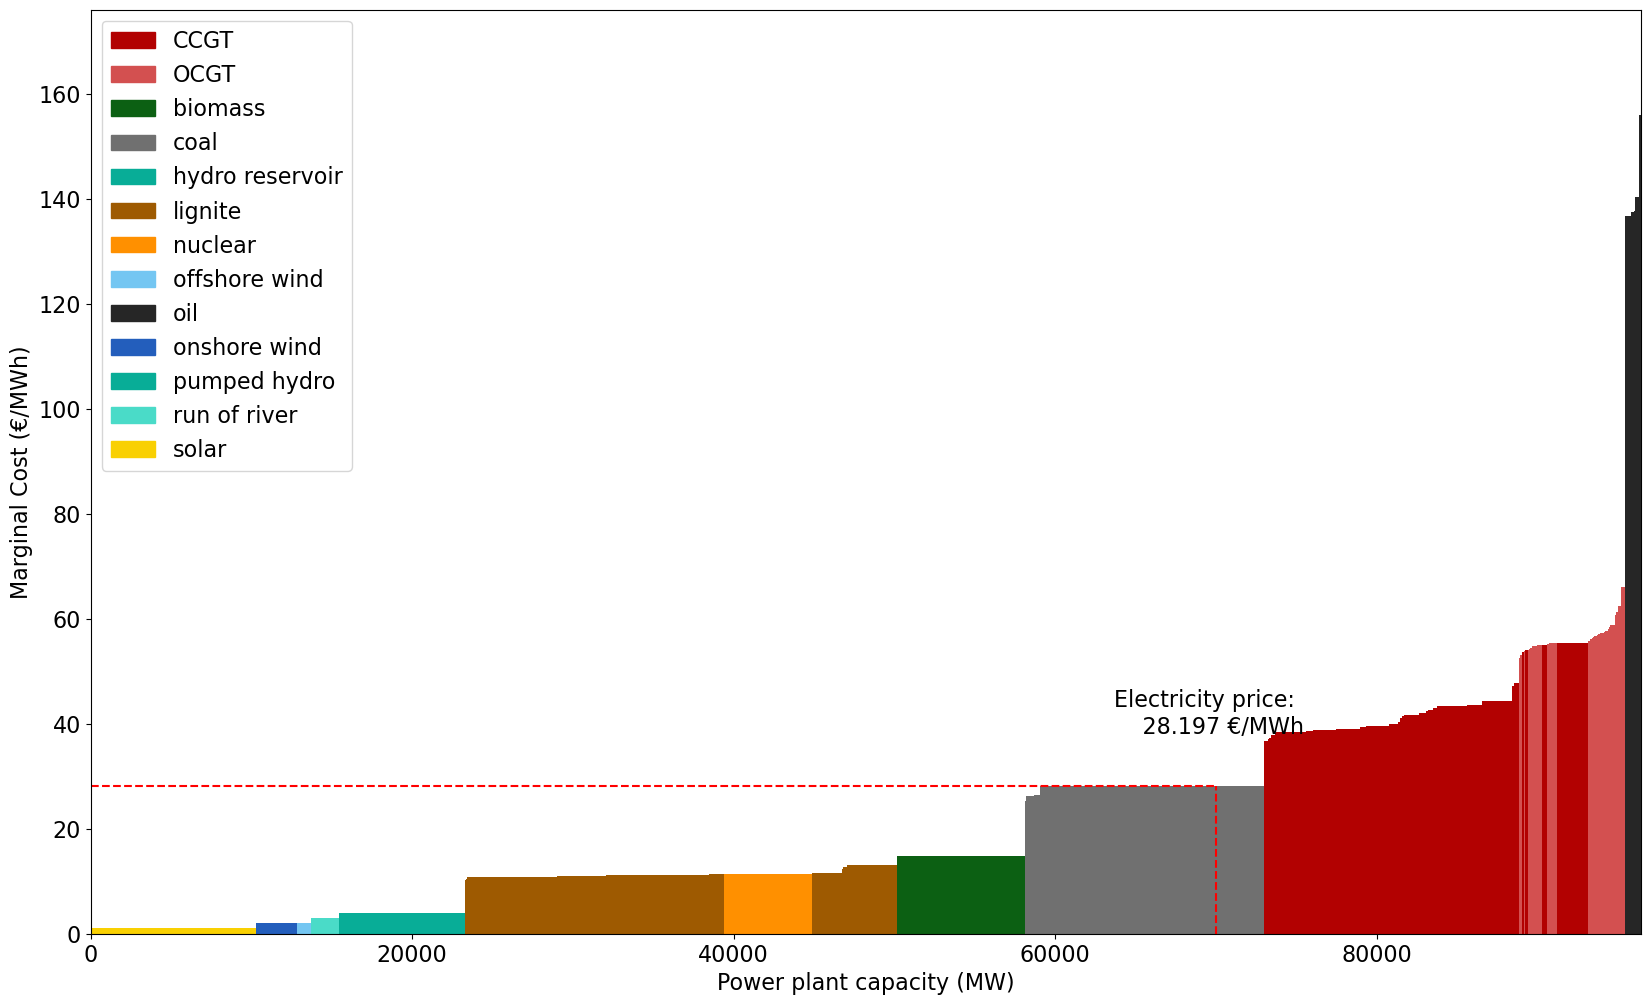

In [111]:
# i: Merit order with maginal costs as in dataset (and a demand of 170000 MW)
df = copy.copy(plants)
df.loc[:, "Available capacity (MW)"] = df.loc[:, "p_max_pu"]*df.loc[:, "p_nom"]
df_capa = df.groupby(["carrier", "marginal_cost", "efficiency"]).agg({"Available capacity (MW)":"sum"})
df_capa.sort_values(by = "marginal_cost", ascending = True, inplace = True)
df_capa.loc[:, "Cumulative capacity (MW)"] = df_capa.loc[:, "Available capacity (MW)"].cumsum()
df_capa.loc[:, "color"] = df_capa.index.map(lambda x: techs.loc[x[0],"color"])
df_marg = df_capa.reset_index()
merit_order(df=df_marg, demand=70000, power_plants=carriers.index, x_pos_col="Cumulative capacity (MW)", cost_type="marginal_cost")


[2 points] ii. with an added carbon price of 80 €/tCO2 (assume that previously no carbon pricing was included)

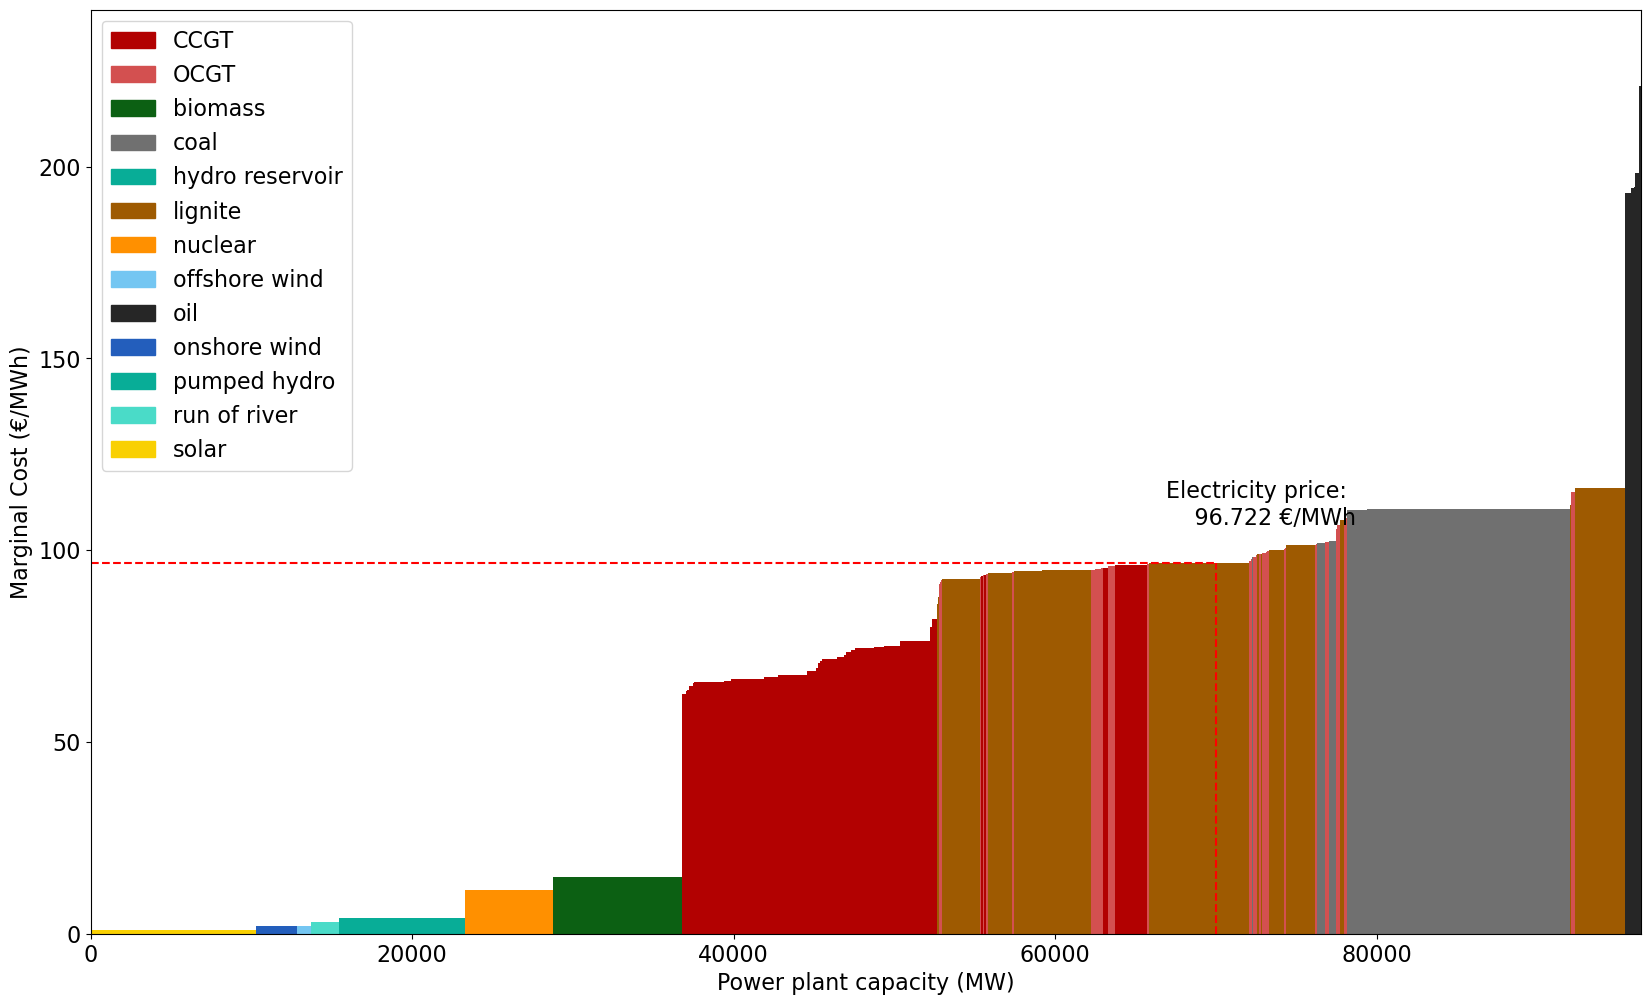

In [112]:
# merit_order(df=df, demand=70000, power_plants=carriers.index, x_pos_col="Cumulative capacity (MW)", cost_type="marginal_co2_costs")

df = copy.copy(plants)
df.loc[:, "Available capacity (MW)"] = df.loc[:, "p_max_pu"]*df.loc[:, "p_nom"]
df_capa = df.groupby(["carrier", "marginal_cost", "efficiency"]).agg({"Available capacity (MW)":"sum"})
df_capa.loc[:, "color"] = df_capa.index.map(lambda x: techs.loc[x[0],"color"])
df_capa.loc[:, "co2_emissions"] = df_capa.index.map(lambda x: techs.loc[x[0],"co2_emissions"])
df_capa = df_capa.reset_index()
df_capa.loc[:, "marginal_co2_costs"] = df_capa.loc[:, "marginal_cost"]+ df_capa.loc[:,"co2_emissions"]*80/df_capa.loc[:,"efficiency"]
df_capa.sort_values(by = "marginal_co2_costs", ascending = True, inplace = True)
df_capa.loc[:, "Cumulative capacity (MW)"] = df_capa.loc[:, "Available capacity (MW)"].cumsum()
df_co2 = df_capa
merit_order(df=df_co2, demand=70000, power_plants=carriers.index, x_pos_col="Cumulative capacity (MW)", cost_type="marginal_co2_costs")

[2 points] iii. additionally to ii. with a gas price increased by 50 €/MWh𝑡ℎ

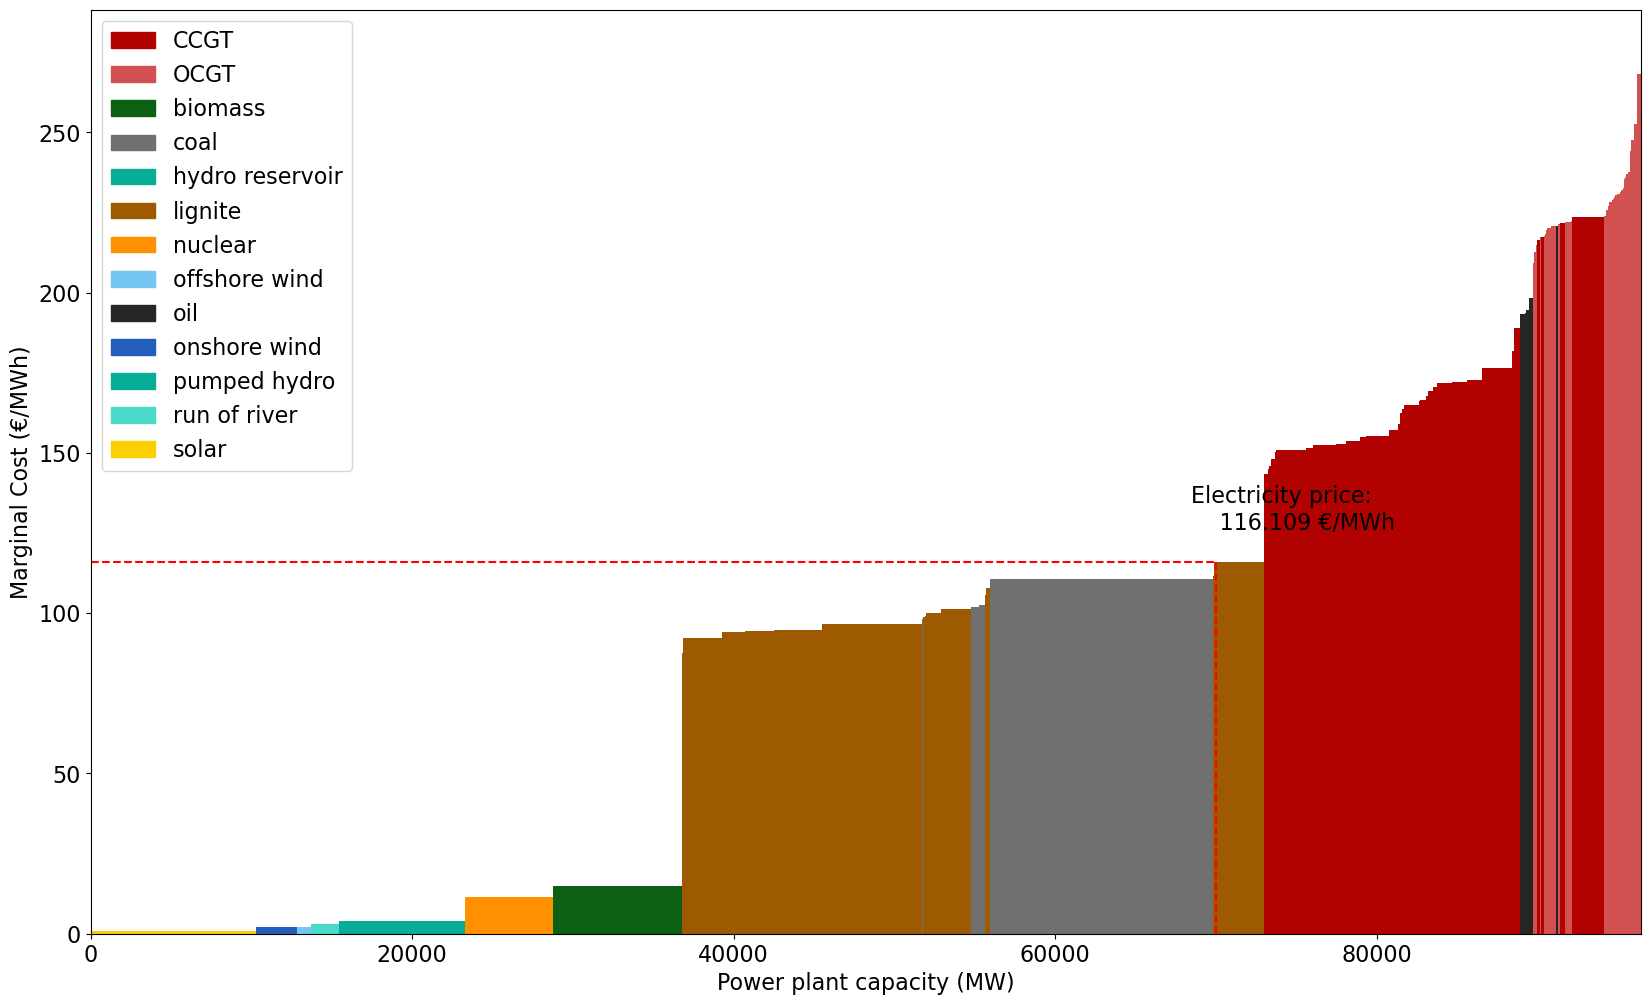

In [113]:
df = copy.copy(plants)
df.loc[:, "Available capacity (MW)"] = df.loc[:, "p_max_pu"]*df.loc[:, "p_nom"]
df_capa = df.groupby(["carrier", "marginal_cost", "efficiency"]).agg({"Available capacity (MW)":"sum"})
df_capa.loc[:, "color"] = df_capa.index.map(lambda x: techs.loc[x[0],"color"])
df_capa.loc[:, "co2_emissions"] = df_capa.index.map(lambda x: techs.loc[x[0],"co2_emissions"])
df_capa = df_capa.reset_index()
df_capa.loc[:, "marginal_co2_costs"] = df_capa.loc[:, "marginal_cost"]+ df_capa.loc[:,"co2_emissions"]*80/df_capa.loc[:,"efficiency"]
df_capa.loc[:, "gas"] = df_capa.carrier.map(lambda x: 50 if x=="OCGT" or x =="CCGT" else 0)
df_capa.loc[:, "marginal_co2_costs_with_gas_increase"] = df_capa.loc[:, "marginal_co2_costs"]+ df_capa.loc[:,"gas"]/df_capa.loc[:,"efficiency"]
df_capa.sort_values(by = "marginal_co2_costs_with_gas_increase", ascending = True, inplace = True)
df_capa.loc[:, "Cumulative capacity (MW)"] = df_capa.loc[:, "Available capacity (MW)"].cumsum()
df_co2_gas = df_capa
merit_order(df=df_co2_gas, demand=70000, power_plants=carriers.index, x_pos_col="Cumulative capacity (MW)", cost_type="marginal_co2_costs_with_gas_increase")

[2 points] iv. additionally to ii. and iii. without Germany’s nuclear power plant fleet

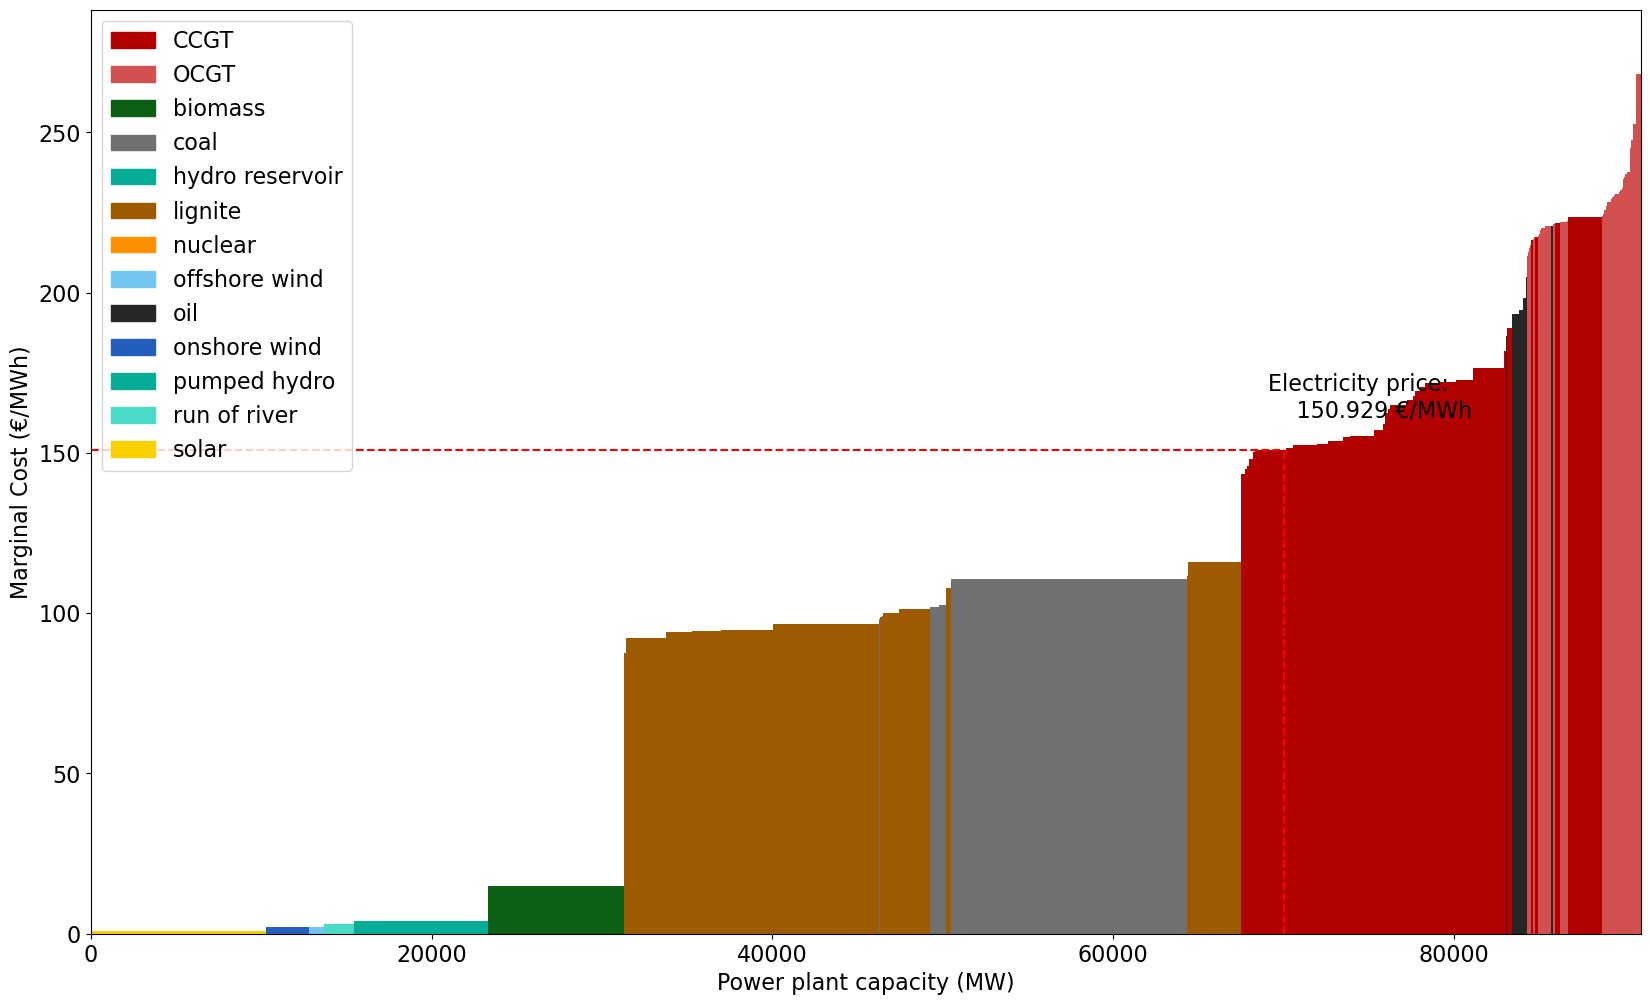

In [114]:
df = copy.copy(plants)
df.loc[:, "Available capacity (MW)"] = df.loc[:, "p_max_pu"]*df.loc[:, "p_nom"]
df_capa = df.groupby(["carrier", "marginal_cost", "efficiency"]).agg({"Available capacity (MW)":"sum"})
df_capa.loc[:, "color"] = df_capa.index.map(lambda x: techs.loc[x[0],"color"])
df_capa.loc[:, "co2_emissions"] = df_capa.index.map(lambda x: techs.loc[x[0],"co2_emissions"])
df_capa = df_capa.reset_index()
index_names = df_capa[ df_capa['carrier'] == "nuclear" ].index
df_capa.drop(index_names, inplace = True)
df_capa.loc[:, "marginal_co2_costs"] = df_capa.loc[:, "marginal_cost"]+ df_capa.loc[:,"co2_emissions"]*80/df_capa.loc[:,"efficiency"]
df_capa.loc[:, "gas"] = df_capa.carrier.map(lambda x: 50 if x=="OCGT" or x =="CCGT" else 0)
df_capa.loc[:, "marginal_co2_costs_with_gas_increase"] = df_capa.loc[:, "marginal_co2_costs"]+ df_capa.loc[:,"gas"]/df_capa.loc[:,"efficiency"]
df_capa.sort_values(by = "marginal_co2_costs_with_gas_increase", ascending = True, inplace = True)
df_capa.loc[:, "Cumulative capacity (MW)"] = df_capa.loc[:, "Available capacity (MW)"].cumsum()
df_nuc = df_capa
#carriers.drop("nuclear", inplace=True)
merit_order(df=df_nuc, demand=70000, power_plants=carriers.index, x_pos_col="Cumulative capacity (MW)", cost_type="marginal_co2_costs_with_gas_increase")

'#### (e) For each of the cases, use code to determine for an electricity demand of 70 GW
[4 points] i. the market clearing price

[2 points] ii. the total power dispatched per technology

[2 points] iii. the resulting revenue per technology

[2 points] iv. the operational costs per technology

[2 points] v. the profits per technology

[4 points] vi. the carbon intensity of the system

In [116]:
demand = 70000
def rest_df(df, demand):
    return df.loc[:cut_off(demand=demand, df = df), :]

#Deleting the rest of the Dataframes with unused powerplants.
df_rest = rest_df(df_marg, demand=demand) #just the marginal cost
df_co2_rest = rest_df(df_co2, demand=demand) #with co2 price of 80€/t
df_co2_gas_rest = rest_df(df_co2_gas, demand=demand) #with co2 price and gas price increase
df_nuc_rest = rest_df(df_nuc, demand=demand) #with co2 price, gas price increase and without nuclear power

rest_set = [[df_rest, "marginal_cost", "including only marginal costs"],
            [df_co2_rest, "marginal_co2_costs", "including CO2 prices of 80€/t"],
            [df_co2_gas_rest,"marginal_co2_costs_with_gas_increase", "including CO2 prices of 80€/t and increased Gas prices by 50€/MWHt"],
            [df_nuc_rest, "marginal_co2_costs_with_gas_increase", "including CO2 prices of 80€/t and increased Gas prices by 50€/MWHt and excluding nuclear power plants"]]

for data in rest_set:
    market_price = data[0].iloc[-1][data[1]]
    print(f"The market clearing price is {market_price} for {data[2]}")



The market clearing price is 28.196969696969692 for including only marginal costs
The market clearing price is 96.72202368538078 for including CO2 prices of 80€/t
The market clearing price is 116.10915077504583 for including CO2 prices of 80€/t and increased Gas prices by 50€/MWHt
The market clearing price is 150.92945588131096 for including CO2 prices of 80€/t and increased Gas prices by 50€/MWHt and excluding nuclear power plants


In [147]:
for data in rest_set:
    energy = data[0].groupby(["carrier"]).agg({"Available capacity (MW)":"sum"})
    last_carrier = data[0].iloc[-1]["carrier"]
    last_energy = data[0].iloc[-1]["Cumulative capacity (MW)"]-demand
    energy.loc[last_carrier,:] = energy.loc[last_carrier,:]-last_energy
    for i in energy.index:
        print(f"When {data[2]}, the total dispatched energy for technology {i} is {energy.loc[i,:].values[0]}")


When including only marginal costs, the total dispatched energy for technology biomass is 8004.647826
When including only marginal costs, the total dispatched energy for technology coal is 11855.513262073331
When including only marginal costs, the total dispatched energy for technology hydro reservoir is 169.5
When including only marginal costs, the total dispatched energy for technology lignite is 21375.403266998434
When including only marginal costs, the total dispatched energy for technology nuclear is 5468.0
When including only marginal costs, the total dispatched energy for technology offshore wind is 861.5091135644408
When including only marginal costs, the total dispatched energy for technology onshore wind is 2561.602368312101
When including only marginal costs, the total dispatched energy for technology pumped hydro is 7659.62
When including only marginal costs, the total dispatched energy for technology run of river is 1777.2753545166927
When including only marginal costs, th

#### [4 points] (f) Describe the major differences you observe between the four cases.

## Task 3: Tools for Electricity Market Modelling [28 points]
##### Build a simple electricity market model for minimising operational costs within technical constraints for South Africa, Mozambique and Eswatini considering the following information:
The operational fleet of power plants in the three countries is specified as follows:

|Technology| Country |Marginal Cost [€/MWh] |Capacity [MW]|
|----------|---------|----------------------|-------------|
|Coal |South Africa |30 |35000|
|Wind |South Africa |0 |3000|
|Gas |South Africa |60 |8000|
|Oil |South Africa |80 |2000|
|Hydro Mozambique |3 |1200|
|Gas |Mozambique |55 |500|
|Hydro |Eswatini |5 |600|

The electricity demand in the countries reads as follows:

|Country |Demand [MW]|
|----------|---------|
|South Africa |42000|
|Mozambique |650|
|Eswatini |250|

The transmission capacities read as follows:

|Start| End| Capacity [MW]|
|----------|---------|---------|
|South Africa| Mozambique |500|
|Mozambique |Eswatini |100|
|South Africa| Eswatini |250|

Assume equal reactances for the transmission lines.

(a) Build and solve the problem using pyomo. You’ll need to:

[3 points] i. create all variables for generation and transmission,

[2 points] ii. formulate the objective function for minimising the operaitonal costs,

[5 points] iii. build the necessary constraints, including the technical limits of generation and transmission
and the Kirchhoff Laws,

[2 points] iv. solve the optimisation model with a solver of your choice,

[3 points] v. retrieve the generator dispatch, power flows, objective function and market prices. Label
units!

#### (b) Build and solve the same problem in PyPSA. You’ll need to:

[1 point] i. create a new network,

[5 points] ii. add the generators, lines, and loads to the network,

[2 points] iii. olve the built network with a solver of your choice,

[3 points] iv. retrieve the generator dispatch, power flows, objective function and market prices. Label
units!

#### [2 points] (c) Check that bothmodels yield the same generator dispatch, objective function, andmarket prices.